# Big data project
## Project organization
We organized our project in the following way:
1. Choose a region thanks to global indicators in France
2. Choose a department in this region to refine your search
3. Choose a city to see all available house rentals

# Global indicators on regions in France
- Number of inhabitants in each region
- Population growth rate
- A selection of major cities to visit
- Average rental prices
- ...

In [24]:
# Usefull imports
import pandas as pd
import xml.etree.cElementTree as et
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact

%matplotlib inline

In [74]:
# All functions used
def select_region(Région):
    selected_region.value = str(Région)

In [3]:
# Read CSV
electricity = pd.read_csv('consommation-electrique-par-secteur-dactivite-commune.csv', sep=";", encoding='utf-8')
# Drop useless columns
electricity.drop(["Nom EPCI", "Code EPCI", "Type EPCI", "Geo Shape", "Geo Point 2D"], axis=1, inplace=True)

# Array of regions
regions = electricity['Nom région'].unique()
regions = sorted(regions)

# Array of departments
departments = electricity['Nom département'].unique()
departments = sorted(departments)

## Global statistics
### Inhabitants

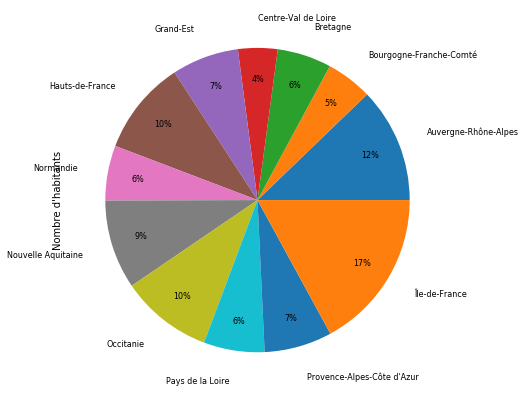

In [82]:
# Total population
localities = electricity.drop_duplicates(['Nom commune', 'Nom département', 'Nom région'])
total_population = localities['Nombre d\'habitants'].sum(axis=0)
# Population per regions
population_by_region = pd.DataFrame(columns=['Nom région', 'Nombre d\'habitants'])
population_by_region['Nom région'] = regions

for index, row in population_by_region.iterrows():
    population_by_region.loc[index, 'Nombre d\'habitants'] = localities.loc[localities['Nom région'] == population_by_region.loc[index, 'Nom région'], 'Nombre d\'habitants'].sum(axis=0)
population_by_region = population_by_region.set_index('Nom région')

ax1 = plt.subplot(121, aspect='equal')
population_by_region.plot(kind='pie', y='Nombre d\'habitants', ax=ax1, figsize=(15,15), labels=population_by_region.index, legend=False, fontsize=8, autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.2)

### Select a region to continue

In [75]:
# Create text widget for output
selected_region = widgets.Text()

interact(select_region, Région=regions)

# Display output variable in text box
selected_region

A Jupyter Widget

A Jupyter Widget

# Indicators in the selected region
- Statistics about each department:
    - Number of inhabitants
    - Percentage of economic activities (agriculture, tertiary, industry)
    - ...

### Inhabitants

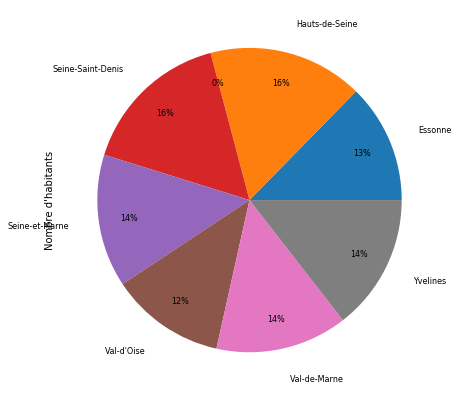

In [84]:
# Population per departments
population_by_department = pd.DataFrame(columns=['Nom département', 'Nombre d\'habitants'])
population_by_department['Nom département'] = sorted((localities["Nom département"][(localities["Nom région"] == selected_region.value)]).drop_duplicates())

for index, row in population_by_department.iterrows():
    population_by_department.loc[index, 'Nombre d\'habitants'] = localities.loc[localities['Nom département'] == population_by_department.loc[index, 'Nom département'], 'Nombre d\'habitants'].sum(axis=0)
population_by_department = population_by_department.set_index('Nom département')

ax1 = plt.subplot(121, aspect='equal')
population_by_department.plot(kind='pie', y='Nombre d\'habitants', ax=ax1, figsize=(15,15), labels=population_by_department.index, legend=False, fontsize=8, autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.2)

# Indicators  in the selected department
- Statistics about 
- City with house rentals
- ...